# Experimenting with some basic sounding data access and plotting

Cribbing from https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html#sphx-glr-examples-upperair-wyoming-request-py and https://unidata.github.io/MetPy/latest/tutorials/upperair_soundings.html

## Access some sounding data using siphon library

In [1]:
from datetime import datetime
import metpy
from metpy.units import units
from metpy.plots import Hodograph, SkewT
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt

In [2]:
date = datetime(2021, 9, 10, 12)
station = 'ALB'

In [3]:
df = WyomingUpperAir.request_data(date, station)

In [4]:
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1000.0,95,16.0,12.9,315.0,3.0,2.121320,-2.121320,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
1,987.0,206,14.4,11.1,307.0,14.0,11.180897,-8.425410,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
2,975.4,305,13.7,10.7,300.0,23.0,19.918584,-11.500000,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
3,968.0,369,13.2,10.4,303.0,24.0,20.128094,-13.071337,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13
4,940.6,610,13.2,8.6,315.0,29.0,20.506097,-20.506097,ALB,72518,2021-09-10 12:00:00,42.69,-73.83,95.0,21.13


In [5]:
df.units

{'pressure': 'hPa',
 'height': 'meter',
 'temperature': 'degC',
 'dewpoint': 'degC',
 'direction': 'degrees',
 'speed': 'knot',
 'u_wind': 'knot',
 'v_wind': 'knot',
 'station': None,
 'station_number': None,
 'time': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meter',
 'pw': 'millimeter'}

## Very basic Skew-T plot

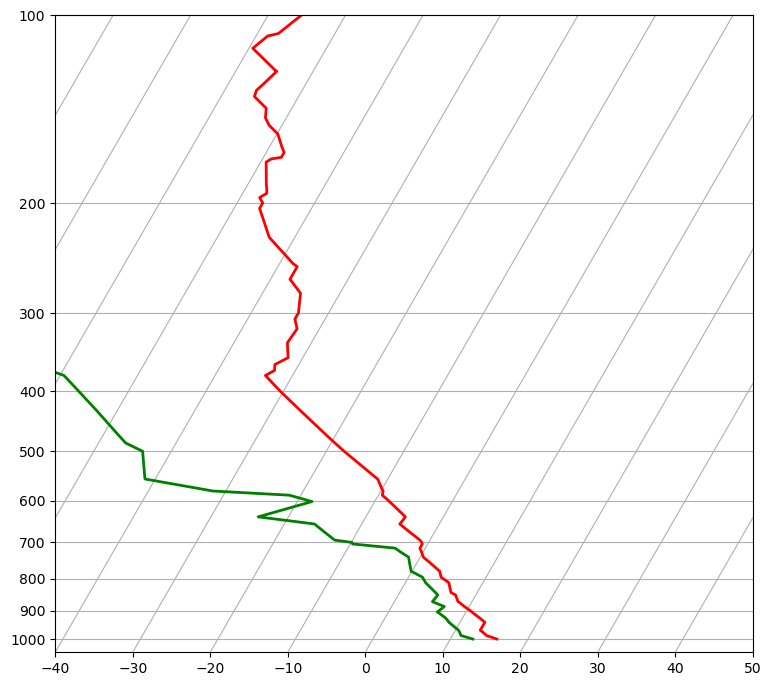

In [6]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(df['pressure'], df['temperature'], 'r', linewidth=2)
skew.plot(df['pressure'], df['dewpoint'], 'g', linewidth=2)

## Better: Attach units to values

In [7]:
pressure = df['pressure'].values * units(df.units['pressure'])
temperature = df['temperature'].values * units(df.units['temperature'])
dewpoint = df['dewpoint'].values * units(df.units['dewpoint'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
v_wind = df['v_wind'].values * units(df.units['v_wind'])

In [8]:
temperature

Magnitude,[16.0 14.4 13.7 13.2 13.2 13.2 12.2 10.9 10.8 9.4 8.5 8.2 7.4 6.6 5.6 5.6 4.2 3.7 3.6 1.6 0.4 -0.2 -0.7 -0.7 -0.9 -1.3 -3.4 -5.1 -5.0 -4.9 -8.1 -8.5 -9.5 -9.7 -10.0 -11.3 -11.5 -17.7 -19.5 -21.4 -26.2 -30.5 -33.2 -33.5 -32.7 -33.1 -31.9 -33.1 -32.9 -32.9 -33.9 -33.9 -33.9 -35.1 -37.5 -37.5 -38.3 -43.3 -46.7 -46.7 -47.5 -46.9 -47.2 -47.6 -49.3 -48.9 -47.7 -47.7 -48.4 -49.9 -51.7 -52.7 -53.3 -55.7 -55.9 -55.4 -54.7 -55.0 -57.7 -59.5 -58.5 -57.3 -55.7 -53.5 -57.5 -55.7 -56.0 -58.1 -59.7 -58.1 -60.1 -56.7 -58.5 -58.1 -55.9 -55.7 -55.9 -56.5 -56.4 -55.1 -55.1 -55.7 -56.5 -55.7 -53.9 -53.7 -53.0 -52.3 -53.3 -50.5 -51.7 -49.3 -49.3 -48.9 -48.7 -46.5 -46.5 -44.3 -45.6 -47.2 -47.7 -44.1 -39.5 -39.6]
Units,degree_Celsius


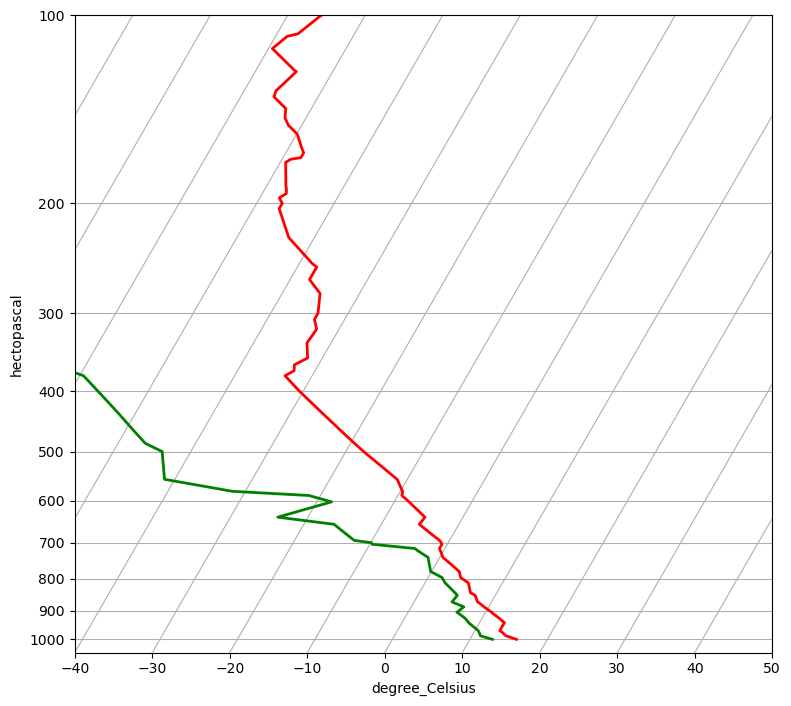

In [9]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
skew.plot(pressure, temperature, 'r', linewidth=2)
skew.plot(pressure, dewpoint, 'g', linewidth=2)

Same graph, but now the axes are automatically labelled with the correct units.

## US Standard Atmosphere

### Definition

| Layer boundaries (km) |  Lapse rate (ºC km$^{-1}$) |
| ----  | ---  |
| 0-11  | +6.5 |
| 11-20 |   0. |
| 20-32 | -1.0 |
| 32-47 | -2.8 |
| 47-51 |   0. |
| 51-71 | +2.8 |
| 71-84.852 | +2.0 |


In [10]:
import numpy as np
import pandas as pd

In [11]:
layer_boundaries = np.array([0., 11., 20., 32., 47., 51., 
                             71., 84.852])
lapse_rate = np.array([6.5, 0., -1., -2.8, 0., 2.8, 2])

num_layers = len(lapse_rate)

temperature_boundaries = np.zeros_like(layer_boundaries)
temperature_boundaries[0] = 288.15

pressure_boundaries = np.zeros_like(layer_boundaries)
pressure_boundaries[0] = 1013.25

Rd = 287.05307
g = 9.80665

layer_top = layer_boundaries[1:]
layer_bottom = layer_boundaries[:-1]

In [12]:
def T_from_lapse(height_above_base, lapse, base_temp=288.15):
    return base_temp - lapse*height_above_base

In [13]:
for n in range(num_layers):
    temperature_boundaries[n+1] = T_from_lapse(layer_top[n]-layer_bottom[n], 
                            lapse_rate[n],
                            base_temp=temperature_boundaries[n])

temperature_bottom = temperature_boundaries[:-1]
temperature_top = temperature_boundaries[1:]

In [14]:
for n in range(num_layers):
    temp_ratio = temperature_boundaries[n+1]/temperature_boundaries[n]
    if lapse_rate[n] != 0:
        pressure_boundaries[n+1] = (pressure_boundaries[n]*(temp_ratio)**(g/Rd/lapse_rate[n]*1000.))
    else:
        pressure_boundaries[n+1] = (pressure_boundaries[n]*
                    np.exp(g/Rd/temperature_boundaries[n]*
                           (layer_boundaries[n]-layer_boundaries[n+1])))

In [15]:
pressure_bottom = pressure_boundaries[:-1]
pressure_top = pressure_boundaries[1:]

In [16]:
df = pd.DataFrame({"Layer bottom": layer_bottom,
                  "Layer top": layer_top,
                  "Lapse rate": lapse_rate,
                  "Temperature at base": temperature_bottom,
                  "Temperature at top": temperature_top,
                   "Pressure at base": pressure_bottom,
                   "Pressure at top": pressure_top,
                  })
df

,Layer bottom,Layer top,Lapse rate,Temperature at base,Temperature at top,Pressure at base,Pressure at top
0,0.0,11.000,6.5,288.15,216.650,1013.250000,226.320637
1,11.0,20.000,0.0,216.65,216.650,226.320637,225.999672
2,20.0,32.000,-1.0,216.65,228.650,225.999672,35.831219
3,32.0,47.000,-2.8,228.65,270.650,35.831219,4.578137
4,47.0,51.000,0.0,270.65,270.650,4.578137,4.575826
5,51.0,71.000,2.8,270.65,214.650,4.575826,0.270454
6,71.0,84.852,2.0,214.65,186.946,0.270454,0.025524


Text(0, 0.5, 'Pressure [hPa]')

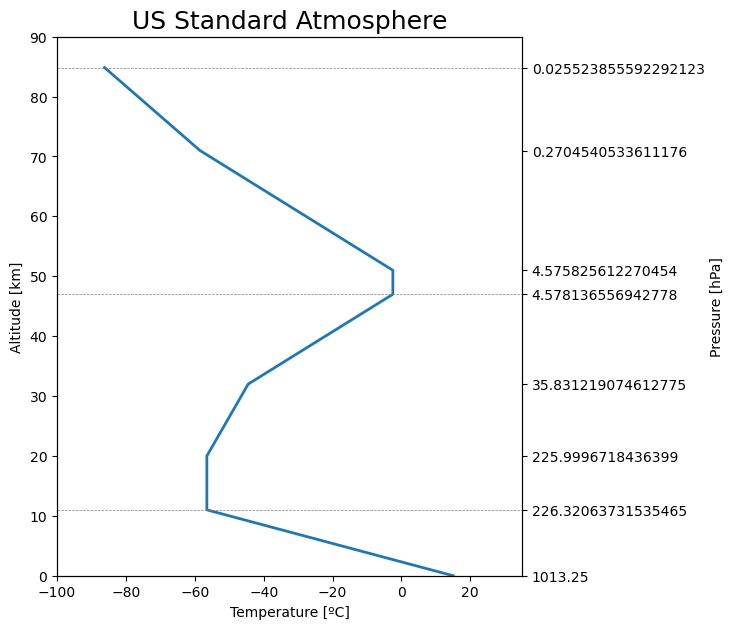

In [17]:
temp_min = -100; temp_max = 35;

fig, ax = plt.subplots(figsize=(6,7))
ax.plot(temperature_boundaries - 273.15, layer_boundaries, linewidth=2)
ax.set_ylabel('Altitude [km]')
ax.set_xlabel('Temperature [ºC]')
ax.set_title('US Standard Atmosphere', fontsize=18)
for n in [0,3,6]:
    ax.hlines(layer_top[n], temp_min, temp_max, linewidth=0.5, color='grey', linestyle='--')
ax.set_xbound([temp_min, temp_max])
ax.set_ylim(0,90)
ax2 = ax.twinx()
ax2.set_ylim(0,90)
ax2.set_yticks(layer_boundaries, labels=pressure_boundaries)
ax2.set_ylabel('Pressure [hPa]')

Still need to add pressure (and density) using piecewise linear lapse rate formula

### Question 4

This is version of problem 1.6 but using python code to download and plot your sounding.

In [18]:
### RUN THIS CODE 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

Here is where you select which station and what date / time you want to plot. 

- Take a look at the interactive web page http://weather.uwyo.edu/upperair/sounding.html to see a map of upper-air stations
- Find the three-letter code for the station you want to use
- Replace `WMW` in the line of code `station = 'WMW'` in the code cell below with your three letter code
   - `WMW` is the code for Maniwaki, Quebec. Please use a different station for your answer
- Replace the year, month, day, and hour in the line of code `date = datetime(2023, 8, 25, 0)` with a different date.

Remember that soundings are routinely taken at 0 UTC and 12 UTC.

In [19]:
station = 'WMW'   # modify to use a different station
date = datetime(year=2023, month=8, day=25, hour=0) # modify to use a different time

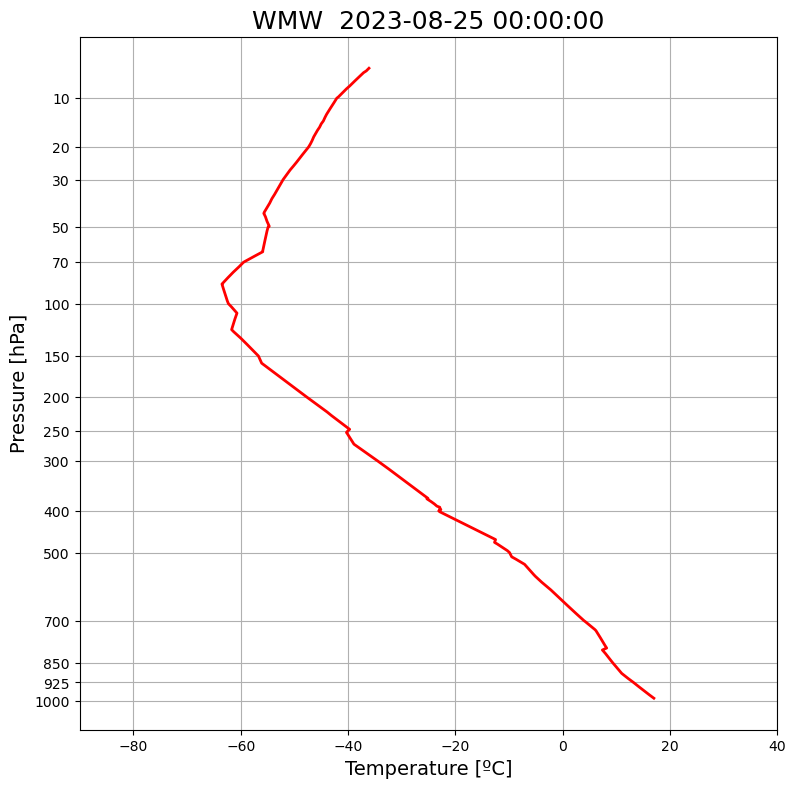

In [20]:
### RUN THIS CODE WITHOUT MODIFICATION
#
#  It will download your data and make a nicely labeled plot
#
###

df = WyomingUpperAir.request_data(date, station)

pticks = np.array([10,20,30,50,70,100,150,200,250,300,400,500,700,850,925,1000])
k = 0.286

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(df['temperature'], df['pressure']**k, 'r', linewidth=2)
ax.invert_yaxis()
ax.set_xlim(-90,40)
ax.set_yticks(pticks**k)
ax.set_yticklabels(pticks)
ax.set_ylabel('Pressure [hPa]', fontsize=14)
ax.set_xlabel('Temperature [ºC]', fontsize=14)
ax.grid()
ax.set_title(f'{station}  {date}', fontsize=18);